In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from matplotlib.widgets import Slider, Button

### Решение нелинейного уравнения переноса

$u_{t}+ \frac{\partial}{\partial x}f(u)=0$ <br/>
$u(x, 0)=\phi(x)$ <br/>
$u(0, t)=0$ <br/>
$u(l, t)=0$ <br/>

$x\in(0, l)$<br/>
$t>0$<br/>
$a(u)=f'(u)$

In [189]:
a = 1

dt = 0.05
t_min = 0
t_max = 10

x0 = 0
x1 = 10

h  = 0.02

X  = np.arange(x0, x1+1e-9, h)

A1 = 0
B1 = 1
C1 = lambda t: 0

A2 = 0
B2 = 1
C2 = lambda t: 0

$\phi(x)=\eta(x-1)\eta(2-x)$<br/>
$a(u)=const$ $\Rightarrow$ $f(u)=const \cdot u$

In [152]:
def solution(x, t):
  return 0

def heaviside(x):
  return 1*(x>=0)

def ph1(x):
  return heaviside(x-1)*heaviside(2-x)
def a1(u):
  return 1
def f1(u):
  return u

def ph2(x):
  return heaviside(x)*heaviside(2-x)*np.sin(np.pi*x/2)**2
def a2(u):
  return u
def f2(u):
  return u*u / 2

In [153]:
def stabilityCondition(layer, a, h, C=0.8):
  a_max = np.max([a(u) for u in layer])
  return C * h / a_max

def solver(X, h, t_min, t_max, ph=ph1, a=a1, f=f1):
  u = []
  T = [t_min]

  firstLayer = [ph(x) for x in X]
  u.append(firstLayer)

  t_current = t_min
  iterLayer = firstLayer
  while t_current < t_max:

    currentLayer = []
    dt = stabilityCondition(iterLayer, a, h)

    if t_current + dt <= t_max:
      t_current += dt
      T.append(t_current)
    else:
      break

    u_0 = C1(t_current)
    currentLayer.append(u_0)

    for k in range(1, len(X) - 1):
      currentLayer.append(1/2 * (iterLayer[k+1] + iterLayer[k-1]) - dt/(2*h) * (f(iterLayer[k+1]) - f(iterLayer[k-1])))

    u_n = C2(t_current)
    currentLayer.append(u_n)  

    u.append(currentLayer)
    iterLayer = currentLayer

  return X, T, u

In [163]:
t_max = 10
X, T, u1 = solver(X, h, t_min=t_min, t_max=t_max, ph=ph1, f=f1, a=a1)

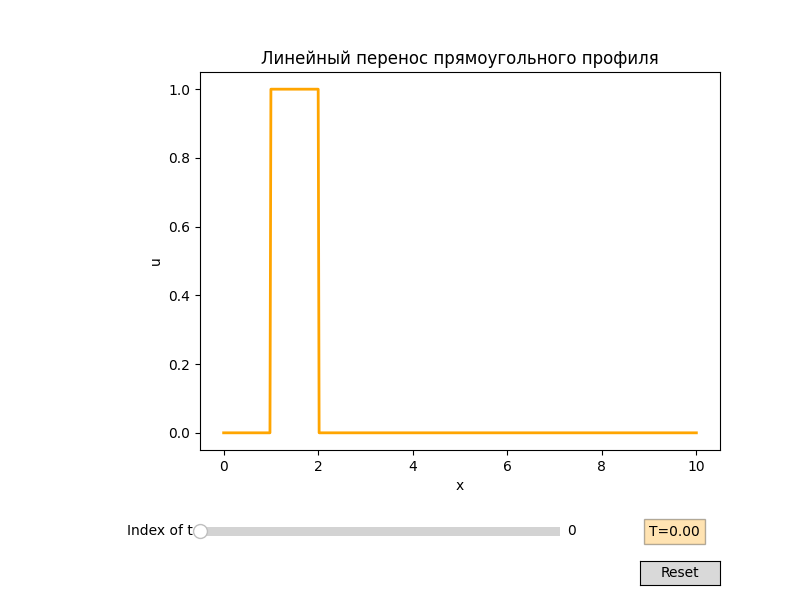

In [164]:
%matplotlib widget
def update(val):
    index = val
    
    ydata  = u1[index]
    text.set_text("T={0:.3f}".format(T[index]))
    
    line.set_ydata(ydata)   
    fig.canvas.draw_idle()    

def reset(event):
    time_slider.reset()


fig, ax = plt.subplots()
fig.set_size_inches((8, 6))
line,   = plt.plot(X, u1[0], lw = 2, color = 'orange')
text    = plt.text(9, -0.3, "T={0:.2f}".format(t_min), fontsize=10, bbox=dict(facecolor='orange', alpha=0.3))

plt.subplots_adjust(left = 0.25, bottom = 0.25)

  
ax_time = plt.axes([0.25, 0.1, 0.45, 0.03])
time_slider = Slider(
    ax      = ax_time,
    label   = "Index of t",
    valmin  = 0,
    valmax  = len(T) - 1,
    valinit = t_min,
    valstep = 1,
    color   = 'orange'
)

time_slider.on_changed(update)


resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button  = Button(resetax, 'Reset', hovercolor='0.975')

button.on_clicked(reset)


ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_title('Линейный перенос прямоугольного профиля')

plt.show()

In [165]:
t_max = 100
X, T, u2 = solver(X, h, t_min, t_max, ph=ph2, f=f2, a=a2)

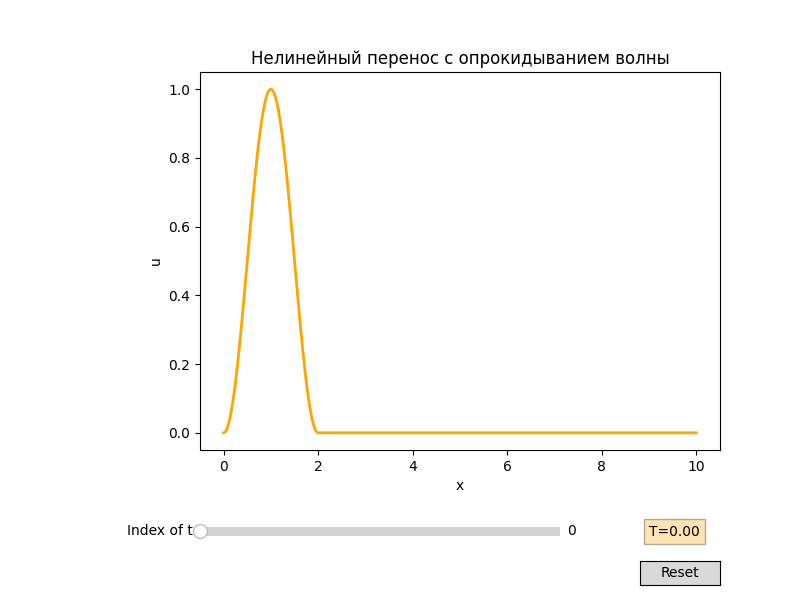

In [166]:
%matplotlib widget
def update(val):
    index = val
    
    ydata  = u2[index]
    text.set_text("T={0:.3f}".format(T[index]))
    
    line.set_ydata(ydata)   
    fig.canvas.draw_idle()    

def reset(event):
    time_slider.reset()


fig, ax = plt.subplots()
fig.set_size_inches((8, 6))
line,   = plt.plot(X, u2[0], lw = 2, color = 'orange')
text    = plt.text(9, -0.3, "T={0:.2f}".format(t_min), fontsize=10, bbox=dict(facecolor='orange', alpha=0.3))

plt.subplots_adjust(left = 0.25, bottom = 0.25)

  
ax_time = plt.axes([0.25, 0.1, 0.45, 0.03])
time_slider = Slider(
    ax      = ax_time,
    label   = "Index of t",
    valmin  = 0,
    valmax  = len(T) - 1,
    valinit = t_min,
    valstep = 1,
    color   = 'orange'
)

time_slider.on_changed(update)


resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button  = Button(resetax, 'Reset', hovercolor='0.975')

button.on_clicked(reset)


ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_title('Нелинейный перенос с опрокидыванием волны')

plt.show()

In [158]:
def ph3(x):
    # e^(-(x-1))+e^(-(x-3))
    # return heaviside(x)*heaviside(1-x)*(np.exp(-9*(x-1)**2)) + heaviside(x-1-h)*heaviside(2-x-h)*(x-1.5)**2 + heaviside(x-2)*heaviside(3-x)*np.exp(-9*(x-2)**2)
    return heaviside(x)*heaviside(8/15-x)*x +\
        heaviside(x-8/15-1e-5)*heaviside(0.9-x)*(-0.5*x + 4/5) +\
        heaviside(x-0.9-1e-5)*heaviside(2.3-x-1e-5)*1.75/5 +\
        heaviside(x-2.3)*heaviside(40/15-x)*(0.5*x - 4/5) +\
        heaviside(x-40/15-1e-5)*heaviside(3.2-x)*(-x+16/5)
def a3(u):
    return 1/(u + 1)
def f3(u):
    return np.log(u + 1)

In [167]:
t_max = 12.5
X, T, u3 = solver(X, h, t_min, t_max, ph=ph3, f=f3, a=a3)

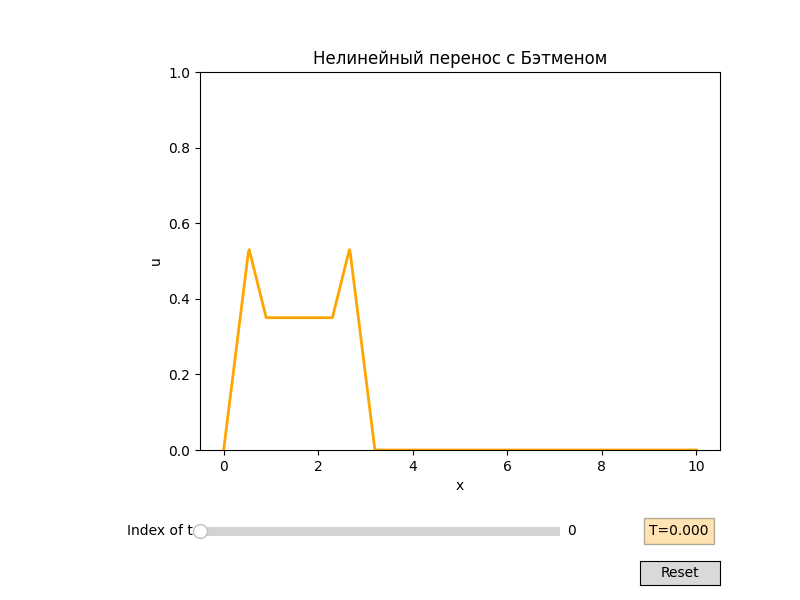

In [168]:
%matplotlib widget
def update(val):
    index = val
    
    ydata  = u3[index]
    text.set_text("T={0:.3f}".format(T[index]))
    
    line.set_ydata(ydata)   
    fig.canvas.draw_idle()    

def reset(event):
    time_slider.reset()


fig, ax = plt.subplots()
fig.set_size_inches((8, 6))
line,   = plt.plot(X, u3[0], lw = 2, color = 'orange')
text    = plt.text(9, -0.225, "T={0:.3f}".format(t_min), fontsize=10, bbox=dict(facecolor='orange', alpha=0.3))

plt.subplots_adjust(left = 0.25, bottom = 0.25)

  
ax_time = plt.axes([0.25, 0.1, 0.45, 0.03])
time_slider = Slider(
    ax      = ax_time,
    label   = "Index of t",
    valmin  = 0,
    valmax  = len(T) - 1,
    valinit = t_min,
    valstep = 1,
    color   = 'orange'
)

time_slider.on_changed(update)


resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button  = Button(resetax, 'Reset', hovercolor='0.975')

button.on_clicked(reset)

ax.set_ylim([0, 1])
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_title('Нелинейный перенос с Бэтменом')

plt.show()

In [190]:
from matplotlib.animation import FuncAnimation

def plot_2D_auto(index, t_max=t_max, ph=ph1, a=a1, f=f1):

    global X

    fig, ax = plt.subplots(figsize=(8,6))
    ax.grid(True)
    p, = ax.plot(0, 0)
    plt.axis([x0-h, x1+h, -0.5, 1.5])
    # Animation Function
    X, T, u = solver(X, h, t_min, t_max, ph=ph, a=a, f=f)

    def animate_plot(i):
        p.set_data(X, u[i])
        return p,

    ani = FuncAnimation(fig,
                        animate_plot,
                        frames=len(T)-1,
                        interval=20)

    ani.save(f'animation_{index}.gif', fps=60)

MovieWriter ffmpeg unavailable; using Pillow instead.


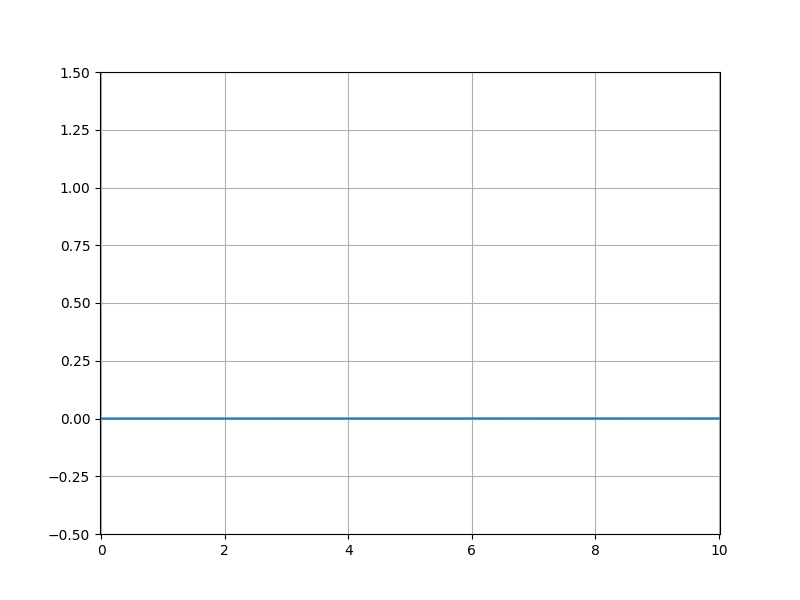

In [191]:
plot_2D_auto(1, t_max = 10, ph=ph1, a=a1, f=f1)

MovieWriter ffmpeg unavailable; using Pillow instead.


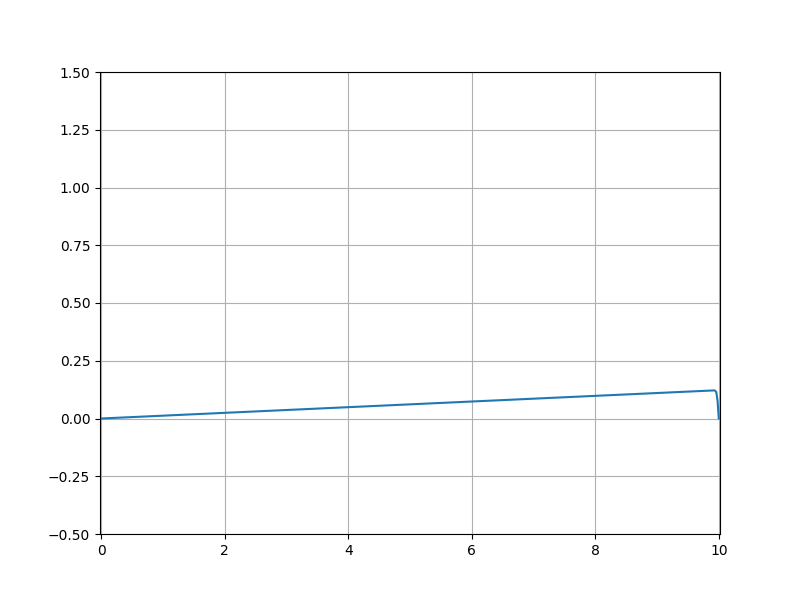

In [192]:
plot_2D_auto(2, t_max=80, ph=ph2, a=a2, f=f2)

MovieWriter ffmpeg unavailable; using Pillow instead.


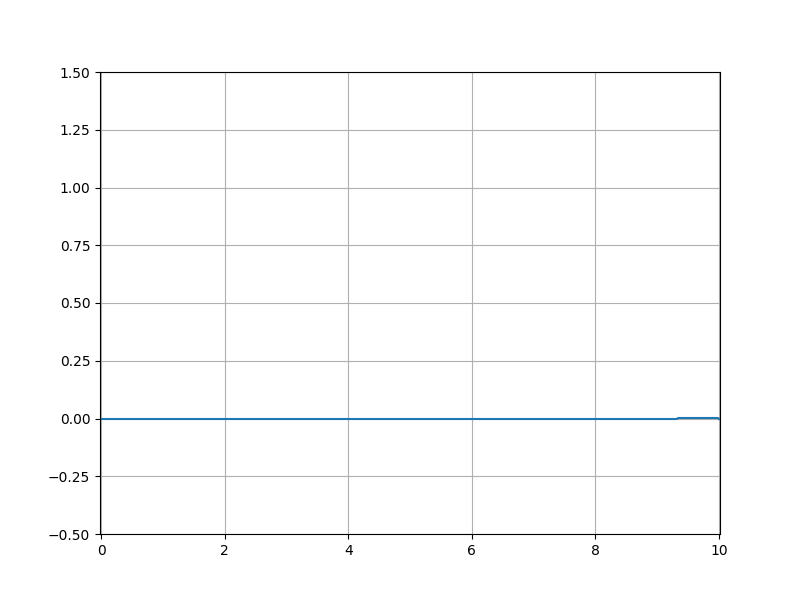

In [193]:
plot_2D_auto(3, t_max = 12.5, ph=ph3, a=a3, f=f3)